In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import regex
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [1]:
import os
os.chdir('../')
from Carga_dataset import df
os.chdir('.\Analisis-PreProcess')

data: (54484, 7) df0: (54484, 6366) df: (54484, 2) X_cat: (54484, 6365) y_cat: (54484,)


In [3]:
df.shape

(54484, 2)

In [4]:
#Convertimos la columna en string para poder trabajar con el texto
df['Descripcion limpia']= df['descripcion'].astype(str)
df['Descripcion limpia']

id_producto
2792-88-LE21-1        CÁMARA RETINAL NO MIDRIÁTICA - ESPECIFICACIONE...
1704-52-LP21-1        SERVICIO DE MUDANZA DE ENSERES PROPIOS Y EN US...
1003-20-L121-1                                    LEÑA SECA CERTIFICADA
4236-21-L121-1                             MARCADOR BLANCO PARA METALES
4236-21-L121-2                                                  PLOMADA
                                            ...                        
1058141-35-LQ21-1              ALTEPLASA FA 50 MG CAJA X 2 FA [216P008]
1058141-35-LQ21-4           TENECTEPLASA FA 10.000 UI (50 MG) [216P185]
1173455-12-LE21-41               manguera transparente para nivel (mts)
1057461-64-LE21-17                        CINTA ADHESIVA 18 MM X 30 MT 
4309-381-LQ21-1       10-100-214-208-01 Olanzapina tableta liofiliza...
Name: Descripcion limpia, Length: 54484, dtype: object

In [5]:
#Removemos la palabra "no" de nuestro stopword ya que nos puede ser útil
sw = stopwords.words('spanish')
sw.remove("no")

In [6]:
#Definimos nuestra función para quitar las tildes
def sin_tildes(s):
    tildes = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for origen, destino in tildes:
        s = s.replace(origen, destino)
    return s




#Definimos una función para el preprocesamiento de texto

def texto_limpio(texto):
    texto = texto.lower() # convertir en minúsculas
    texto = re.sub(r"[\W\d_]+", " ",texto) # remover caract especiales y números
    texto = sin_tildes(texto) # remove tildes
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if len(palabra) > 3] # eliminar palabras con menos de 3 letras
    texto = [palabra for palabra in texto if palabra not in sw] # stopwords
    texto = " ".join(texto)
    return texto

In [7]:
df['Descripcion limpia'] = df['Descripcion limpia'].apply(lambda texto: texto_limpio(texto)) #Aplicamos la función texto_limpio para limpiar las descripciones
df.shape

(54484, 3)

In [8]:
stemmer=SnowballStemmer("spanish")
#Obtención de texto raíz limpio
def texto_raiz(texto):    
    texto = texto.lower() # convertir en minúsculas
    texto = re.sub(r"[\W\d_]+", " ",texto) # remover caract especiales y números
    texto = sin_tildes(texto) # remove tildes
    texto = texto.split() # tokenizar
    texto = [palabra for palabra in texto if len(palabra) > 3] # eliminar palabras con menos de 3 letras
    texto = [palabra for palabra in texto if palabra not in sw] # stopwords
    texto = [stemmer.stem(palabra) for palabra in texto] #stem
    texto = " ".join(texto)
    
    return texto

In [9]:
df['descripcion']= df['descripcion'].astype(str)
df['Descripcion raiz limpia']= df['descripcion'].apply(lambda texto: texto_raiz(texto)) #Aplicamos la función texto_raiz que nos convierte las palabras en sus raíces
df['Descripcion raiz limpia tk']= df['Descripcion raiz limpia'].apply(lambda x:nltk.word_tokenize(x,"spanish"))
df.shape

(54484, 4)

In [12]:
#Creamos un nuevo df con los datos deseados para la matriz TD-IDF
#df1=df.iloc[:, 6:]
df.drop(columns=['descripcion','Descripcion limpia'], axis=1, inplace=True)


In [20]:
df['Descripcion limpia tk']= df['Descripcion limpia'].apply(lambda x:nltk.word_tokenize(x,"spanish"))

In [14]:
palabras_descripcion = set([i for i in df['Descripcion limpia']])
palabras = ''
for i in palabras_descripcion:
    palabras = palabras + ' ' +i

palabras_tk = df['Descripcion raiz limpia tk'].sum()
palabras_unicas = set(palabras_tk)
len(palabras_unicas)

19535

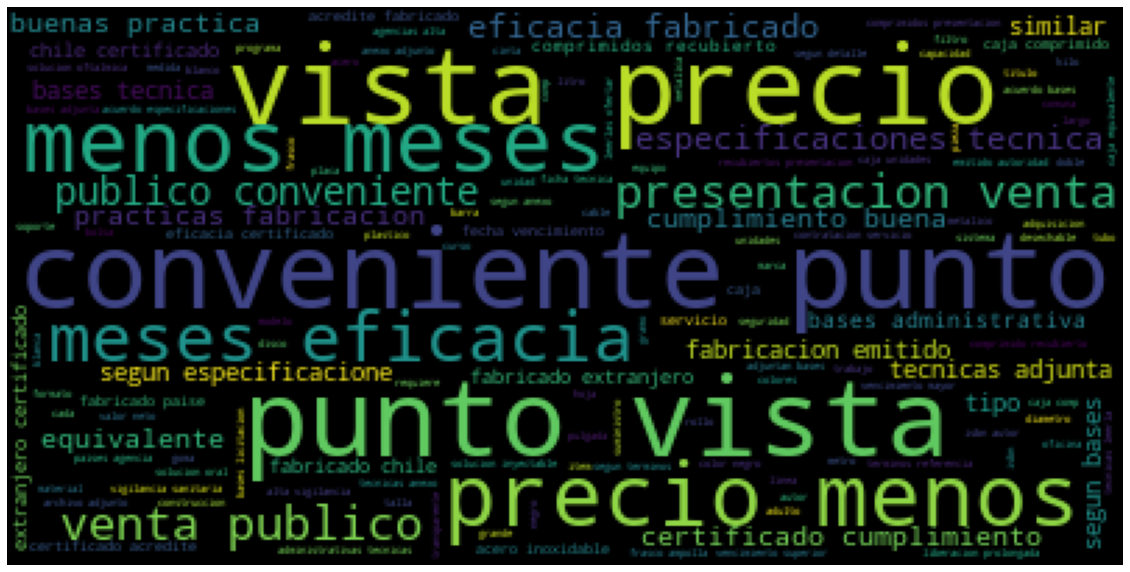

In [18]:
palabras_wc = WordCloud(background_color='black', max_words=len(palabras), stopwords=sw)
palabras_wc.generate(palabras)

fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(palabras_wc)
ax.axis('off')
plt.show()

In [ ]:
palabras_tk2 = df['Descripcion limpia tk'].sum()
palabras_unicas2 = set(palabras_tk2)
len(palabras_unicas2)


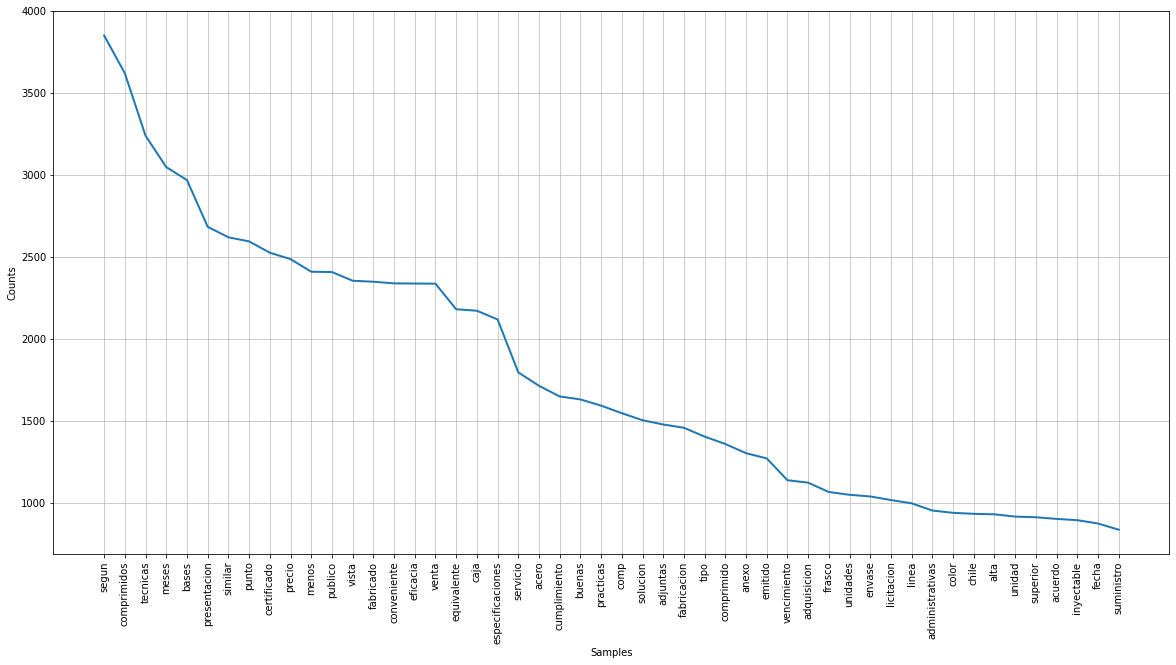

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
nltk.FreqDist(nltk.Text(palabras_tk2)).plot(50)

In [30]:
sacar_palabras = ['segun','bases','meses','presentacion',
    'punto','certificado','precio','menos','publico','vista',
    'fabricado','conveniente','eficacia','venta','cumplimiento'
    'caja','especificaciones','buenas','practicas','tipo','licitacion',
    'administrativas','chile','fecha','requiere','paises','requiere',
    'ofertar','detalle']
for i in sacar_palabras:
    sw.append(i)

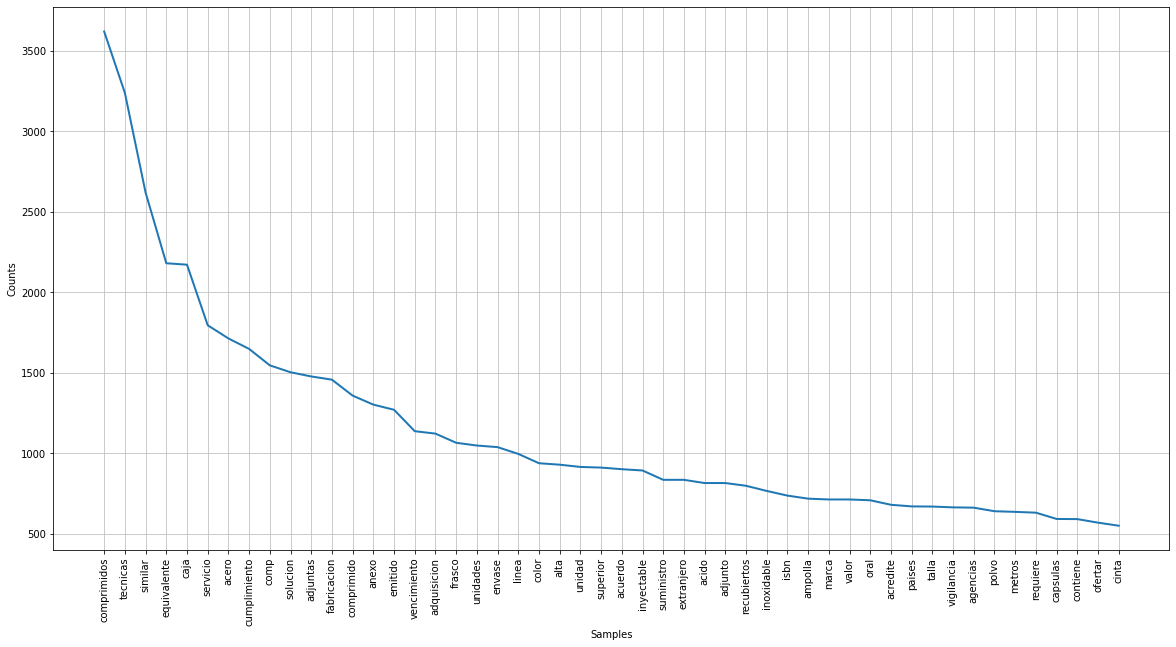

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
df['Descripcion limpia2'] = df['Descripcion limpia'].apply(lambda texto: texto_limpio(texto)) #Aplicamos la función texto_limpio para limpiar las descripciones
df['Descripcion limpia tk2']= df['Descripcion limpia2'].apply(lambda x:nltk.word_tokenize(x,"spanish"))

palabras_descripcion2 = set([i for i in df['Descripcion limpia2']])
palabras2 = ''
for i in palabras_descripcion2:
    palabras2 = palabras2 + ' ' +i

palabras_tk22 = df['Descripcion limpia tk2'].sum()
palabras_unicas2 = set(palabras_tk22)



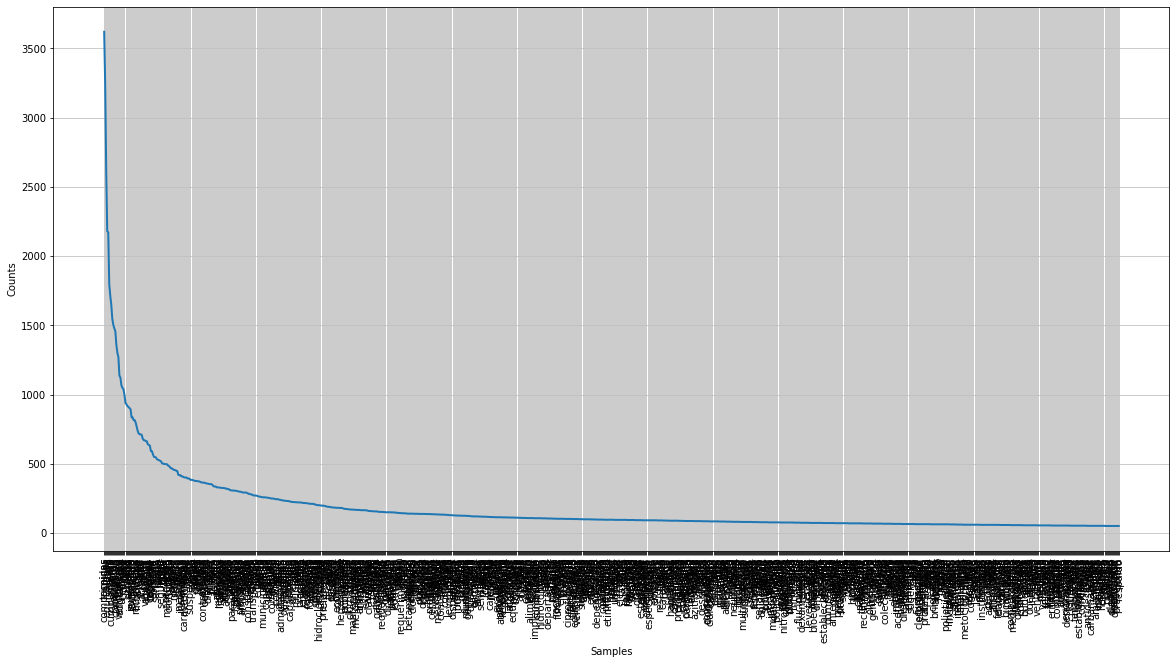

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
nltk.FreqDist(nltk.Text(palabras_tk22)).plot(1000)

In [14]:
#Creamos nuestra bolsa de palabras

count = CountVectorizer()
descripcion = np.array(df['Descripcion raiz limpia'])
bag = count.fit_transform(descripcion)

In [18]:
len(descripcion)

51646

In [ ]:
distribucion=nltk.FreqDist(count.vocabulary_) 
lista_frecuencias=distribucion.most_common() #Para ordenar la distribución de la frecuencia de palabras
print(lista_frecuencias)

In [19]:
#Observamos las palabras presentadas en las descripciones limpias
n_palabras= count.vocabulary_
n_palabras

{'cam': 2929,
 'retinal': 15773,
 'midriat': 11890,
 'especif': 6851,
 'bas': 2016,
 'tecnic': 17575,
 'servici': 16535,
 'mudanz': 12299,
 'enser': 6591,
 'propi': 14843,
 'hospital': 9129,
 'martin': 11382,
 'quillot': 15160,
 'ofert': 12991,
 'segun': 16383,
 'anex': 969,
 'leñ': 10668,
 'sec': 16343,
 'certific': 3485,
 'marcador': 11321,
 'blanc': 2390,
 'metal': 11698,
 'plom': 14233,
 'azadon': 1821,
 'mang': 11247,
 'escobillon': 6777,
 'ase': 1471,
 'municipal': 12405,
 'caj': 2841,
 'lapiz': 10447,
 'carpinter': 3193,
 'hoj': 9063,
 'marcosierr': 11332,
 'cint': 3762,
 'papel': 13485,
 'equivalent': 6704,
 'masking': 11401,
 'tap': 17503,
 'pegot': 13723,
 'ancho': 927,
 'carpet': 3190,
 'carton': 3227,
 'pigment': 14041,
 'ofici': 12999,
 'color': 4192,
 'azul': 1840,
 'plastific': 14196,
 'accoclip': 99,
 'archiv': 1310,
 'tamañ': 17484,
 'auc': 1621,
 'cart': 3218,
 'plumon': 14244,
 'permanent': 13887,
 'punt': 15038,
 'redond': 15465,
 'roj': 15968,
 'negr': 12575,
 'ver

In [20]:
len(n_palabras)

19535

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
#creamos nuestra matriz TF - IDF con el df1
tfidf = TfidfTransformer()
np.set_printoptions(precision=2)
#print(tfidf.fit_transform(bag).toarray())

In [25]:
tfidf.fit_transform(bag)

<51795x19535 sparse matrix of type '<class 'numpy.float64'>'
	with 329331 stored elements in Compressed Sparse Row format>

In [26]:
vectorizador = TfidfVectorizer()
 
#Crear una matriz dispersa
cantidades = count.fit_transform(descripcion)
valores = vectorizador.fit_transform(descripcion)
 
print ("--- Palabras ---")
print(vectorizador.get_feature_names())
print ("... Vector de cantidades ...")
print (cantidades)
print ("¨¨¨ Vector de valores ¨¨")
print (valores)



--- Palabras ---
['aac', 'aacc', 'aaguj', 'aalt', 'aasht', 'aatic', 'aavv', 'abacav', 'abadiaisbn', 'abaj', 'abarc', 'abaro', 'abarrot', 'abas', 'abast', 'abastec', 'abaster', 'abat', 'abatacept', 'abatecept', 'abbas', 'abbott', 'abcdin', 'abcidinc', 'abciximab', 'abdom', 'abdominal', 'abduccion', 'abductor', 'abecedari', 'abecedarioi', 'abecidiin', 'abedicin', 'abedul', 'abej', 'abejassofi', 'abejit', 'abelleir', 'aberr', 'abertur', 'abex', 'abiert', 'abirateron', 'abism', 'ablacion', 'abland', 'ablewar', 'abog', 'abomin', 'abon', 'abord', 'abordaj', 'aboton', 'abranquil', 'abras', 'abrasi', 'abrasion', 'abraz', 'abrazader', 'abre', 'abreboc', 'abrefacil', 'abrelat', 'abreti', 'abricot', 'abrig', 'abril', 'abrillant', 'abrir', 'abro', 'abroch', 'absolut', 'absor', 'absorb', 'absorbedor', 'absorbent', 'absorcion', 'abuel', 'abuelit', 'abund', 'aburr', 'acab', 'acabadi', 'acaci', 'academ', 'academi', 'academic', 'acamp', 'acanal', 'acaramel', 'acced', 'acces', 'accesibil', 'accesori', '

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
len(vectorizador.vocabulary_)

19535